# Dairy Product Cost Effeciency

Program ini ditujukan untuk melakukan peningkatan profit perusahaan melalui efisiensi cost, salah satunya adalah efisiensi penggunaan mesin pendingin untuk menyimpan produk-produk diary. Tujuan bisnis yang akan dicapai adalah cost reduction sebesar 10% pada quartal pertama setelah efesiensi dilakukan. Akan dipilih beberapa produk yang memiliki rasio yang rendah antara penjualan dan penyipaman, kemudian akan diputuskan untuk tidak lagi menjual produk tersebut. Visualisasi hasil analisa yang dilakukan dapat juga diakses melalui Tableau Piblic pada link berikut: https://public.tableau.com/shared/SGD8QNRPH?:display_count=n&:origin=viz_share_link 

***Create by**       Ediashta Narendra Amarussalam*

______

# Identifikasi Masalah

**LATAR BELAKANG MASALAH :** 

Supermarket A baru saja membuka channel penjualan online melalui marketplace, seluruh barang yang dipesan customer melalui channel online tersebut akan dikirimkan langsung dari gudang terdekat yang ada di setiap negara bagian. Sehingga perlu dilakukan efisiensi pada channel penjualan konvensional di setiap branch. Berdasarkan perhitungan tahunan, cost paling besar terdapat pada biaya listrik untuk penyimpanan produk-produk beku,dan mudah rusak salah satunya adalah dairy product seperti susu, keju, butter dan yoghurt. Terdapat dataset yang memiliki informasi dairy product yang dibeli dari suplier dengan asal farm yang berbeda-beda, sehingga keputusan dalam manajemen yang akan diputuskan adalah dengan mengeliminasi asal suplier dan farm yang memproduksi produk dengan waktu paling lama untuk terjual. 


**SMART FRAMEWORK**
1. SPESIFIK : Tujuan yang ingin dicapai adalah untuk menaikkan profit Supermarket A melalui cost reduction.
2. MEASURABLE : Tujuan dapat dicapai dengan cara menekan cost inventory sebsar 10%.
3. ACHIVABLE : Pencapaian tujuan dapat dilakukan dengan mengiliminasi produk-produk yang dengan perbandaingan yang kecil antara kuantitas terjual dengan kuantitas tersimpan.
4. RELEVANT: Eliminasi produk yang memiliki ratio invteroy turnover rendah, dapat mengarahkan perusahaan untuk lebih efisen dalam cost inventory-nya.
5. TIME-BOND : Keberhehasilan dapat dilihat pada quarter pertama setelah projek ini diselesaikan.



**PROBLEM STATEMENT :**  
Supermarket A berusaha meningkatkan profitabilitas dengan mengurangi biaya, dengan target spesifik pengurangan 10% dalam pengeluaran. Fokus utama adalah meningkatkan efisiensi inventory dengan mengidentifikasi dan mengeliminasi produk yang memiliki rasio penjualan terhadap unit tersimpan yang rendah. Inisiatif pengurangan biaya ini ditujukan untuk mengurangi biaya operasional dan meminimalisir pemborosan terkait produk yang kurang potensial. Tujuan diharapkan dapat tercapai dalam kuartal pertama setelah keputusan eliminasi dilakukan.


**PENJABARAN MASALAH :**
1. Berapa rata-rata cost perbulan dalam penyimpanan produk diary selama tahun 2022 - 2023? Adakah periode tertentu yang dapat ditarik pola-nya?
2. Berapa total rata-rata cost untuk setiap produk? Apakah sebanding dengan rata-rata revenue setiap produk? Produk apa yang memiliki cost tinggi dan revenue rendah?
3. Berapa turnover ratio untuk setiap produk? Apakah dapat menunjukkan produk yang kurang profitable?
4. Berapa perbandingan suplier terhadap produk yang paling kurang profitable di tahun 2022 dan 2023?
5. Apakah produk yang memeiliki turnover ratio paling rendah disebabkan oleh harga yang tingii? Akan dilakukan pengujian korelasi
6. Apakah kategori produk yang akan diveluasi memiliki hubungan dengan farm? atau suplier?

# 1. Data Loading

## 1.1 Environment Preparation

In [25]:
#import package and library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## 1.2 Data Loading

In [26]:
#load data from csv
df = pd.read_csv("AgricultureData.csv")
df =df[df["category"] == "Dairy"].sort_values(by='sale_date', ascending= False, ignore_index= True)
df.head()

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date
0,7ba3ccef-363a-40c5-9bbd-a451068846c5,Yogurt,Dairy,3.31,16722,5300,11422,Fresh Dairy Farms,"South Ruthie, NY",2023-12-31
1,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.07,10089,1455,8634,Dairyland Co-op,"Port Ubaldoport, ME",2023-12-31
2,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.34,18550,14488,4062,Happy Cows Dairy,"Croninstad, SC",2023-12-31
3,57ad2178-9598-4981-b0f7-78a91162821e,Cheese,Dairy,9.33,7291,5558,1733,Organic Valley,"Lindcester, GA",2023-12-31
4,7ba3ccef-363a-40c5-9bbd-a451068846c5,Yogurt,Dairy,3.18,26056,7884,18172,Organic Valley,"Whitneycester, OK",2023-12-30


## 1.3 Observasi Data

### 1.3.1 Observasi Dimensi Dataframe

In [27]:
print ("DATASET INFO")
print(df.info())
print ("-" * 60)
print ("DATASET COLUMN")
print(df.columns)

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        1811 non-null   object 
 1   product_name      1811 non-null   object 
 2   category          1811 non-null   object 
 3   price_per_kg      1811 non-null   float64
 4   units_shipped_kg  1811 non-null   int64  
 5   units_sold_kg     1811 non-null   int64  
 6   units_on_hand_kg  1811 non-null   int64  
 7   supplier          1811 non-null   object 
 8   farm_location     1811 non-null   object 
 9   sale_date         1811 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 141.6+ KB
None
------------------------------------------------------------
DATASET COLUMN
Index(['product_id', 'product_name', 'category', 'price_per_kg',
       'units_shipped_kg', 'units_sold_kg', 'units_on_hand_kg', 'supplier',
       'farm_location', 'sale_

Hasil observasi terhadap metadata dataframe adalah:
1. Dataframe memiliki dimensi 1811 baris dan 10 kolom.
2. Tidak terdapat null-values dari baris dan kolom yang ada.
3. Tipe data cenderung sesuai dengan karakteristik nilai kolom, hanya nilai pada kolom ['sale_date'] saja yang perlu diubah tipe data-nya menjadi date.
4. Penamaan kolom cenderung sesuai tidak memiliki distorsi berupa strips sehingga akan mudah diakses.

Langkah selanjutnya setelah observasi awal adalah perubahan tipe data kolom ['sale_date'] menjadi date. Penggantian nama kolom agar lebih sesuai dengan konteks dan mudah dipahami juga mungkin dilakukan pada tahapan data cleaning nantinya.

### 1.3.2 Observasi Kolom

In [28]:
#observasi values dalam kolom
df.head(2)

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date
0,7ba3ccef-363a-40c5-9bbd-a451068846c5,Yogurt,Dairy,3.31,16722,5300,11422,Fresh Dairy Farms,"South Ruthie, NY",2023-12-31
1,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.07,10089,1455,8634,Dairyland Co-op,"Port Ubaldoport, ME",2023-12-31


In [29]:
#observasi uniqeue values kolom-kolom kategorikal
print ("-" * 60)
print(df['product_id'].value_counts())
print ("-" * 60)
print(df['product_name'].value_counts())
print ("-" * 60)
print(df['category'].value_counts())
print ("-" * 60)
print(df['supplier'].value_counts())
print ("-" * 60)
print(df['farm_location'].value_counts())
print ("-" * 60)
print(df['sale_date'].value_counts())

------------------------------------------------------------
product_id
57ad2178-9598-4981-b0f7-78a91162821e    464
6c8adfc3-2114-4b78-a3e2-2269a6a0dc02    454
9bb2d8db-a7ac-4d40-9d3c-0c96cafe7153    447
7ba3ccef-363a-40c5-9bbd-a451068846c5    446
Name: count, dtype: int64
------------------------------------------------------------
product_name
Cheese    464
Milk      454
Butter    447
Yogurt    446
Name: count, dtype: int64
------------------------------------------------------------
category
Dairy    1811
Name: count, dtype: int64
------------------------------------------------------------
supplier
Dairyland Co-op      483
Fresh Dairy Farms    462
Happy Cows Dairy     444
Organic Valley       422
Name: count, dtype: int64
------------------------------------------------------------
farm_location
St. Clair Shores, FL    2
Jermeyview, NM          2
South Ruthie, NY        1
Jadonborough, MD        1
Lake Jazmynton, KS      1
                       ..
Orange, MA              1
Port Ka

Hasil observasi kolom dapat disimpulkan melalui deskripsi untuk setiap kolom:

1. **Kolom ['product_id']**        : berisi id yang merepresentasikan setiap nama produk, hubungan tersebut dapat diidentifikasi melalui pegamatan visual dan jumlah unique values sebanyak 4. Tipe data kolom ini sudah sesuai yaitu object.

2. **Kolom ['product_name']**       : berisi nama produk yang terikat dengan kolom ['product_id'], memiliki 4 unique values yang terdiri dari 'Chesee', 'Milk', 'Butter' dan 'Yogurt'. Tipe data kolom ini sudah sesuai yaitu object.
3. **Kolom ['category']**           : bersisi kategori produk untuk keempat nama produk, kolom ini nantinya akan di-takeout karena seluruh produk dalam datframe ini merupakan produk dairy sehingga tidak diperlukan lagi.
4. **Kolom ['price_per_kg']**       : berisi harga jual yang berbeda-beda dari setiap produk, sebagai contoh adalah produk 'Milk' memiliki harga jual yang berbeda-beda. Tipe data kolom ini sudah sesuai yaitu float, karena terdapat nilai desimal didalamnya.
5. **Kolom ['units_shipped_kg']**   : berisi total jumlah barang yang dibeli dari suplier. Kolom ini memiliki hubungan berupa hasil penjumlahan kolom ['units_sold_kg'] dengan kolom ['units_on_hand_kg']. Tipe data kolom ini sudah sesuai yaitu integer, dengan satuan terkecil 1 kg.
6. **Kolom ['units_sold_kg']**      : berisi jumlah barang yang sudah terjual dari periode pencatatan. Tipe data kolom ini sudah sesuai yaitu integer, dengan satuan terkecil 1 kg.
7. **Kolom ['units_on_hand_kg']**   : berisi jumlah barang yang belum terjual dari periode pencatatan. Tipe data kolom ini sudah sesuai yaitu integer, dengan satuan terkecil 1 kg.
8. **Kolom ['supplier']**           : berisi nama suplier untuk setiap barang, memiliki 4 unique values tetapi tidak memiliki ketrikatan dengan nama produk. Sehingga setiap suplier dapat mensuplai lebih dari satu macam produk. Tipe data kolom ini sudah sesuai yaitu object.
9. **Kolom ['farm_location']**      : berisi lokasi kota atau munincipal farm, diikuti oleh nama negara bagian. Tipe data kolom ini sudah sesuai yaitu object.
10. **Kolom ['sale_date']**        : berisi tanggal yang tidak menggambarkan runtutan peristiwa, sehingga karakter tanggal yang ada bukan merupakan time-series. Pengertian sale date ini dapat disimpulkan sebagai tanggal kapan inventory checking dilakukan. Tipe data kolom ini akan diubah dari object menjadi date.

## 1.3.3 Observasi Duplikasi

In [30]:
df.duplicated().sum()

0

In [31]:
#cek kesamaan produk

df[df.duplicated(subset=['product_name','supplier','farm_location'])]

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date


Tidak ditemukan adanya duplikasi melalui pengecekan dua query di atas. Sehingga tidak perlu dilakukan handling duplikasi kedepannya

**Kesimpulan tahap observasi:**

Data Understanding: 

Dataset yang tersedia menampilkan informasi berupa laporan hasil inventory checking yang dilakukan kepada setiap produk pada periode terntentu. Tidak dispesifikkan detail kategeori produknya, hanya diinformasikan terdapat empat macam produk yaitu susu, keju, butter dan yogurt dengan suplier dan farm asal yang berbeda-beda. Product ID juga mendandakan empat macam kategori tersebut saja, tidak ada spesifikasi lebih lanjut yang dapat dijelaskan dari Product ID. Dengan pemahaman tersebut dapat disimpulkan bahwa informasi yang diberikan merupakan initial saja, karena bisa jadi sebetulnya yang dimaksudkan dalam satu baris adalah susu varian low fat, dan bari lainnya susu varian UHT. Identifikasi yang akan dilakukan nantinya adalah dengan mengetahui asal farm dan suplier untuk produk tertentu, dalam kasus ini adalah menentukan mana yang paling lama untuk terjual. Contohnya ditemukan bahwa mayoritas produk dairy yang mengendap paling lama di penyimpanan adalah keju, kemudian dapat diobservasi lebih lanjut dari kumpulan keju yang berada paling lama terjual berasal dari suplier mana dan farm mana. Cara identifikasi kesamaan produk dalam baris berbeda adalah ketika nama produk, asal suplier dan asal farm-nya juga sama.

Untuk kolom sale_date dapat dipahami dan disimpulkan sebagai tanggal pengecekan inventory secara tidak terstruktur karena tidak ada pola yang dapat disimpulkan dari tanggal tersebut. Kedepannya tanggal pada kolom sale_date akan dijadikan patokan periodical saja, pada bulan apa dan tahun berapa inventory check dilakukan.

# 2. Data Cleaning

Dengan tahapan observasi dan Data Understanding, apa yang akan dilakukan dalam data cleaning adalah sebagai berikut:

1. Kolom ['farm_location'] akan di-split sehingga menghasilkan expand berupa nama kota atau munincipal dan inisial negara bagiannya.
2. Covert data type ['sale_date'] unutk memastikan keberhasilan proses ekstraksi nilai kolom.
2. Extract kolom ['sale_date'] menjadi Y M dan Y agar mempermudah grouping dalam proses analisa.
2. Menambahkan kolom ['turnover_ratio'] yang merupakan hasil pembagian dari quantity terjual ['units_sold_kg'] dengan quantity total ['units_shipped_kg'].
4. Menambahkan kolom ['storage_cost'] yang berisi hasil perkalian antara ['price_per_kg'] dengan kolom ['units_on_hand'].
6. Menambahkan kolom ['revenue'] yang berisi hasil perkalian kolom ['units_sold_kg'] dengan kolom ['price_per_kg'].
4. Drop kolom ['category'], ['produsct_id'] dan ['farm_location'] karena sudah tidak relevan.


## 2.1 Split String Column ['farm_loaction']

In [32]:
df[['farm_city','farm_state']] = df['farm_location'].str.split(', ', expand = True)
df.head(2)

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date,farm_city,farm_state
0,7ba3ccef-363a-40c5-9bbd-a451068846c5,Yogurt,Dairy,3.31,16722,5300,11422,Fresh Dairy Farms,"South Ruthie, NY",2023-12-31,South Ruthie,NY
1,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.07,10089,1455,8634,Dairyland Co-op,"Port Ubaldoport, ME",2023-12-31,Port Ubaldoport,ME


In [33]:
df.isnull().sum()
#hasil split oke, state bisa diakses, dan tidak ada null values

product_id          0
product_name        0
category            0
price_per_kg        0
units_shipped_kg    0
units_sold_kg       0
units_on_hand_kg    0
supplier            0
farm_location       0
sale_date           0
farm_city           0
farm_state          0
dtype: int64

## 2.2 Convert Data Type ['sale_date']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        1811 non-null   object 
 1   product_name      1811 non-null   object 
 2   category          1811 non-null   object 
 3   price_per_kg      1811 non-null   float64
 4   units_shipped_kg  1811 non-null   int64  
 5   units_sold_kg     1811 non-null   int64  
 6   units_on_hand_kg  1811 non-null   int64  
 7   supplier          1811 non-null   object 
 8   farm_location     1811 non-null   object 
 9   sale_date         1811 non-null   object 
 10  farm_city         1811 non-null   object 
 11  farm_state        1811 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 169.9+ KB


In [35]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df.info()
#success, Dtype = datatime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_id        1811 non-null   object        
 1   product_name      1811 non-null   object        
 2   category          1811 non-null   object        
 3   price_per_kg      1811 non-null   float64       
 4   units_shipped_kg  1811 non-null   int64         
 5   units_sold_kg     1811 non-null   int64         
 6   units_on_hand_kg  1811 non-null   int64         
 7   supplier          1811 non-null   object        
 8   farm_location     1811 non-null   object        
 9   sale_date         1811 non-null   datetime64[ns]
 10  farm_city         1811 non-null   object        
 11  farm_state        1811 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 169.9+ KB


## 2.3 Extract Y M D Column ['sale_date']

In [36]:
df['year'] = df['sale_date'].dt.year
df['month'] = df['sale_date'].dt.month
df['day'] = df['sale_date'].dt.day
df.head() #success

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date,farm_city,farm_state,year,month,day
0,7ba3ccef-363a-40c5-9bbd-a451068846c5,Yogurt,Dairy,3.31,16722,5300,11422,Fresh Dairy Farms,"South Ruthie, NY",2023-12-31,South Ruthie,NY,2023,12,31
1,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.07,10089,1455,8634,Dairyland Co-op,"Port Ubaldoport, ME",2023-12-31,Port Ubaldoport,ME,2023,12,31
2,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.34,18550,14488,4062,Happy Cows Dairy,"Croninstad, SC",2023-12-31,Croninstad,SC,2023,12,31
3,57ad2178-9598-4981-b0f7-78a91162821e,Cheese,Dairy,9.33,7291,5558,1733,Organic Valley,"Lindcester, GA",2023-12-31,Lindcester,GA,2023,12,31
4,7ba3ccef-363a-40c5-9bbd-a451068846c5,Yogurt,Dairy,3.18,26056,7884,18172,Organic Valley,"Whitneycester, OK",2023-12-30,Whitneycester,OK,2023,12,30


## 2.4 Add Column ['turnover_ratio']

Kolom turnover ratio akan berguna pada saat proses analisa, hal ini akan menghasilkan gambaran produk mana yang efektif atau tidak efektif untuk dijual karena perbandingan stock total dan jumlah produk terjualnya. Semakin tinggi angka turnover ratio, atau semakin mendekati 1, maka produk semakin cepat terjual, dan berlaku pula sebaliknya jika semakin menjauh dari 1 artinya produk tidak terjual dengan cepat dan akan memakan cost penyimpanan. 

In [37]:
df['turnover_ratio'] = (df['units_sold_kg'] / df['units_shipped_kg'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_id        1811 non-null   object        
 1   product_name      1811 non-null   object        
 2   category          1811 non-null   object        
 3   price_per_kg      1811 non-null   float64       
 4   units_shipped_kg  1811 non-null   int64         
 5   units_sold_kg     1811 non-null   int64         
 6   units_on_hand_kg  1811 non-null   int64         
 7   supplier          1811 non-null   object        
 8   farm_location     1811 non-null   object        
 9   sale_date         1811 non-null   datetime64[ns]
 10  farm_city         1811 non-null   object        
 11  farm_state        1811 non-null   object        
 12  year              1811 non-null   int32         
 13  month             1811 non-null   int32         
 14  day               1811 n

## 2.5 Add Column ['storage_cost']

Kolom storage cost diperlukan dalam identifikasi produk mana yang berkontribusi besar dalam cost yang dikeluarkan perusahaan. Kolom ini akan menjadi komplementer dengan kolom ['turnover_ratio'] dalam mengidentifikasi produk mana yang tidak potensial untuk di-keep di toko.

In [38]:
df['storage_cost'] = (df['units_on_hand_kg'] / df['price_per_kg'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_id        1811 non-null   object        
 1   product_name      1811 non-null   object        
 2   category          1811 non-null   object        
 3   price_per_kg      1811 non-null   float64       
 4   units_shipped_kg  1811 non-null   int64         
 5   units_sold_kg     1811 non-null   int64         
 6   units_on_hand_kg  1811 non-null   int64         
 7   supplier          1811 non-null   object        
 8   farm_location     1811 non-null   object        
 9   sale_date         1811 non-null   datetime64[ns]
 10  farm_city         1811 non-null   object        
 11  farm_state        1811 non-null   object        
 12  year              1811 non-null   int32         
 13  month             1811 non-null   int32         
 14  day               1811 n

## 2.6 Add Column ['revenue']

['revenue'] akan membantu pertimbangan dalam mengidentifikasi seberapa profitablenya suatu produk, setelah dianalisa ['storage_cost'] dan ['turnover_ratio'] nya. Hal ini diperlukan karena ['turnover_ratio'] membandingkan antara jumlah produk terjual dengan total inventory, sedangkan belum ada pembanding antara produk tidak terjual dengan produk yang terjual plus dikalikan dengan nominalnya. Sebagai contoh adalah, ketika ratio turover bernilai 0.25, maka tidak dapat semata-mata dieliminasi karena bisa saja harga ..

In [39]:
df['revenue'] = (df['units_sold_kg'] * df['price_per_kg'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_id        1811 non-null   object        
 1   product_name      1811 non-null   object        
 2   category          1811 non-null   object        
 3   price_per_kg      1811 non-null   float64       
 4   units_shipped_kg  1811 non-null   int64         
 5   units_sold_kg     1811 non-null   int64         
 6   units_on_hand_kg  1811 non-null   int64         
 7   supplier          1811 non-null   object        
 8   farm_location     1811 non-null   object        
 9   sale_date         1811 non-null   datetime64[ns]
 10  farm_city         1811 non-null   object        
 11  farm_state        1811 non-null   object        
 12  year              1811 non-null   int32         
 13  month             1811 non-null   int32         
 14  day               1811 n

## 2.7 Drop Column ['product_id'], ['category'], ['farm_location']

Drop beberapa kolom ini dilakukan karena sudah tidak relevan dan tergantikan dengan kolom lainnya.

In [40]:
df =df.drop(columns=['product_id','category', 'farm_location'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_name      1811 non-null   object        
 1   price_per_kg      1811 non-null   float64       
 2   units_shipped_kg  1811 non-null   int64         
 3   units_sold_kg     1811 non-null   int64         
 4   units_on_hand_kg  1811 non-null   int64         
 5   supplier          1811 non-null   object        
 6   sale_date         1811 non-null   datetime64[ns]
 7   farm_city         1811 non-null   object        
 8   farm_state        1811 non-null   object        
 9   year              1811 non-null   int32         
 10  month             1811 non-null   int32         
 11  day               1811 non-null   int32         
 12  turnover_ratio    1811 non-null   float64       
 13  storage_cost      1811 non-null   float64       
 14  revenue           1811 n

**Kesimpulan tahap data cleaning:**

Perubahan dataframe yang terjadi selama tahap data cleaning dalah perubahan jumlah kolom, karena adanya penambahan kolom dan penghapusan kolom. Baris yang ada tidak berubah karena tidak adanya handling missing values dan penghapusan duplikasi. Untuk nama dataframe juga tidak berubah, yaitu menggunakan 'df'.

In [41]:
df.to_csv('dairy_product_report.csv', index=False)

# 3. Analysis dan Perhitungan

## 3.1 Analisa Storage Cost

Storage cost adalah cost yang ditimbulkan dari barang yang belum atau tidak terjual, storage cost dihitung dari harga produk dikalikan dengan produk yang masih berada di storage. Pada proses ini akan ditentukan apakah point cost tertinggi (cost paling mahal) berada pada bulan-bulan terntentu atau cenderung didominasi oleh kategori produk tertentu. Setelah dapatkan salah satunya maka akan dialaisa lebih lanjut menggunakan perbandingan ratio turovernya.

### 3.1.1 Rata-rata Cost per Bulan

In [42]:
# membuat df avarage monthly cost
average_monthly_cost = df.groupby(['year', 'month'])['storage_cost'].mean().round(2).reset_index()
print(average_monthly_cost)
ovall_monthly_cost = average_monthly_cost['storage_cost'].mean()
print('rata-rata cost dalam stiap bulan adalah $', ovall_monthly_cost.round(2))


    year  month  storage_cost
0   2022      1       5389.80
1   2022      2       4485.62
2   2022      3       4171.23
3   2022      4       4681.24
4   2022      5       4888.32
5   2022      6       5220.22
6   2022      7       3750.09
7   2022      8       5592.53
8   2022      9       6318.80
9   2022     10       4534.97
10  2022     11       5793.94
11  2022     12       4110.36
12  2023      1       5900.76
13  2023      2       5263.89
14  2023      3       4115.03
15  2023      4       4373.11
16  2023      5       5664.24
17  2023      6       4817.12
18  2023      7       5558.83
19  2023      8       3251.98
20  2023      9       5142.16
21  2023     10       5770.64
22  2023     11       5922.10
23  2023     12       4826.24
rata-rata cost dalam stiap bulan adalah $ 4980.97


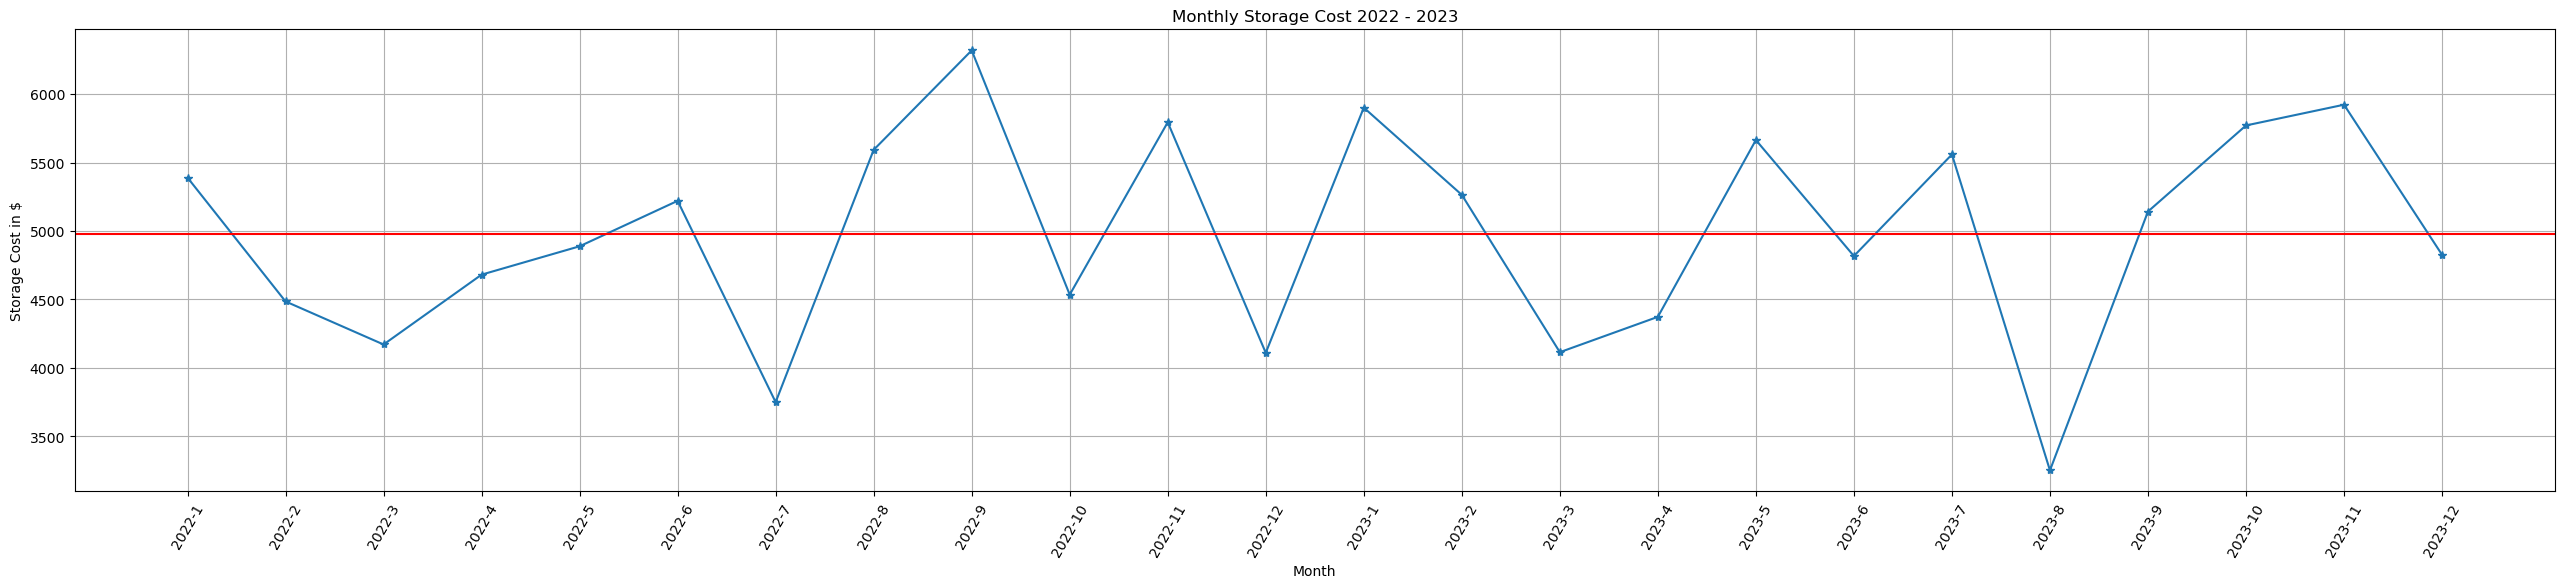

In [43]:
# menambah colomn ['month_year'] pada df average_cost
average_cost = 4980.9675 #state total rata-rata bulanan untuk plt.axhline
average_monthly_cost['month_year'] = average_monthly_cost['year'].astype(str) + '-' + average_monthly_cost['month'].astype(str)
# set size plot
plt.figure(figsize=(32, 6))

# Line Plot
plt.subplot(1, 1, 1) #set canvas
plt.plot(average_monthly_cost['month_year'], average_monthly_cost['storage_cost'], marker='*', linestyle='-')
plt.axhline(y=average_cost, color='r', linestyle='-') #line total rata-rata

#set atribut
plt.title('Monthly Storage Cost 2022 - 2023')
plt.xlabel('Month')
plt.ylabel('Storage Cost in $')
plt.xticks(rotation=60)
plt.grid()

Dalam rentang dua tahun, terdapat 11 storage cost yang berada diatas rata-rata, tetapi belum ada kesimpulan spesifik yang bisa ditarik. Selain itu, line chart diatas menandakan bahwa persebaran antara rata-rata bulanan yang diatas total avarege dengan yang dibawah average berjumlah sama (12 bulan di atas avg dan 12 bulan di bawah avg) sehingga tidak tergambarkan pola tertentu. Analisa akan dilanjutkan dengan memperhitungkan cost dan revenue dari masing-masing kategori produk.

### 3.1.2 Rata-rata Cost Setiap Produk

In [44]:
# buat df untuk rata-rata
average_prod_cost = df.groupby('product_name')['storage_cost'].mean().round(2).reset_index()
print(average_prod_cost)
ovall_prod_cost = average_prod_cost['storage_cost'].mean()
print('rata-rata cost keseluruhan adalah : $', ovall_monthly_cost.round(2))

  product_name  storage_cost
0       Butter       2627.34
1       Cheese       1579.41
2         Milk      11294.42
3       Yogurt       4476.66
rata-rata cost keseluruhan adalah : $ 4980.97


Susu memeiliki storage cost yang paling tinggi, lebih dari dua kali rata-rata. Artinya kontribusi terbanyak untuk cost penyimpanan adalah dari produk susu. Selanjutnya akan dilakukan analisa singkat dengan perbandingan revenue-nya.

In [45]:
#cek perbandingan dengan revenue
average_revenue = df.groupby('product_name')['revenue'].mean().round(2).reset_index()
print(average_revenue)

  product_name   revenue
0       Butter  65534.47
1       Cheese  98612.68
2         Milk  15600.93
3       Yogurt  37363.44


Produk susu juga memiliki revenue yang paling kecil, jadi kesimpulannya cost paling tinggi ditimbulkan dari penyimpanan susu tanpa adanya perbandingan yang linear dengan revenue. Produk susu memiliki kemungkinan terbesar untuk dirampingkan dan dipilih hanya dari beberapa suplier atau farm tertentu saja. Langkah setelah ini akan dilakukan observasi turn over rationya untuk memilih produk susu mana yang paling berkontribusi besar dalam penyipanan tentapi berkontribusi kecil dalam penkjualan.

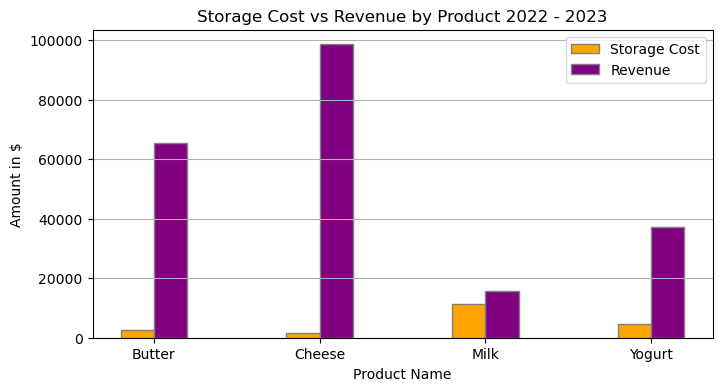

In [46]:

# merging df revenue dan cost
combined_df = pd.merge(average_prod_cost, average_revenue, on='product_name')

# bar size
bar_width = 0.20

# Set bar position
r1 = np.arange(len(combined_df['product_name']))
r2 = [x + bar_width for x in r1]

# plot size
plt.figure(figsize=(8, 4))

# define bar
plt.bar(r1, combined_df['storage_cost'], color='orange', width=bar_width, edgecolor='grey', label='Storage Cost')
plt.bar(r2, combined_df['revenue'], color='purple', width=bar_width, edgecolor='grey', label='Revenue')

# Atribut text
plt.title('Storage Cost vs Revenue by Product 2022 - 2023')
plt.xlabel('Product Name')
plt.ylabel('Amount in $')
plt.xticks([r + bar_width / 2 for r in range(len(combined_df['product_name']))], combined_df['product_name'])
plt.legend()

# print
plt.grid(axis='y')
plt.show()

Berikut adalah visualisai perbandingan revenue dengan cost penyimpanan, kesimpulannya adalah bahwa susu dominan dalam menyebebkan cost tetapi tidak sebanding lurus dengan revenue yang dihasilkan, jika dibandingkan dengan ketiga produk lainnya.

Setelah mendapatkan gambaran umum dari kategori produk dairy, selanjutnya akan dilakukan analisa yang lebih spesifik, yaitu terhadap produk susu saja. Kalkulasi yang akan diberlakukan adalah turnover ratio, karena tidak ada produk pembanding selain susu nantinya. Sehingga kesimpulan dapat ditarik nantinya adalah dari tinggi atau rendahnya prosentase jumlah produk terjual melalui turnover ratio.

Pada perbandingan cost dan revenue, poin yang menjadi titik analisa adalah besar atau kecilnya cost, atau nominal yang mana sudut pandang yang dominan adalah financial. Sedangkan pada ratio turnover adalah persentase, sehingga dapat dititik beratkan pada efiktifitas.

## 3.2 Analisa Produk 'Milk'

## 3.2.1 Persebaran Supplier Produk Susu

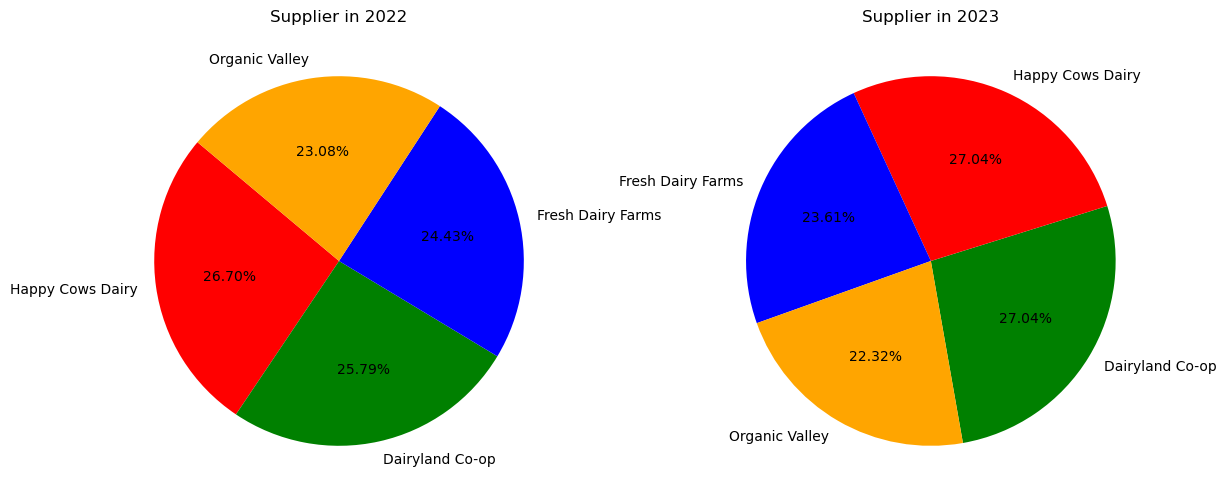

In [47]:
df_milk = df[df['product_name'] == 'Milk']

# buat piehart susu X suplier
df_milk2022 = df_milk[df_milk['year'] == 2022]
df_milk2023 = df_milk[df_milk['year'] == 2023]

# Grup supplier each year
milk_supp_2022 = df_milk2022['supplier'].value_counts()
milk_supp_2023 = df_milk2023['supplier'].value_counts()

# Create piechart
plt.figure(figsize=(14, 6))

# Piechart 2022
plt.subplot(1, 2, 1)
plt.pie(milk_supp_2022, labels=milk_supp_2022.index, autopct='%1.2f%%', startangle=140, colors=['red','green','blue','orange'])
plt.title('Supplier in 2022')

# Piechart 2023
plt.subplot(1, 2, 2)
plt.pie(milk_supp_2023, labels=milk_supp_2023.index, autopct='%1.2f%%', startangle=1000, colors=['green','red','blue','orange'])
plt.title('Supplier in 2023')

# print
plt.show()


Persebaran suplai produk susu dari empat suplier cenderung merata, tidak ada yang mendominasi suplai produk. Sehingga dapat diasumsikan setiap suplier memiliki porsi yang cenderung sama dalam kontribusi angka penjualan produk susu.

## 3.2.2 Perbandingan Turnover Rate Setiap Produk

In [48]:
# buat df untuk rata-rata
average_turnover_ratio = df.groupby('product_name')['turnover_ratio'].mean().round(2).reset_index()
print(average_turnover_ratio)

  product_name  turnover_ratio
0       Butter            0.51
1       Cheese            0.50
2         Milk            0.50
3       Yogurt            0.49


Nilai ratio yang semaikin tiggi atau semakin mendakati 1 mengartikan perputaran produk yang semakin baik, artinya jumlah produk yang terjual semakin mendekati julah total produk yang di inteventory. Berlaku pula sebaliknya. Dari empat kategori produk, persebaran nilai rationya cenderung sama, sehingga nilai ratio di atas tidak bisa dijadikan justifikasi untuk memilih produk mana yang perlu dievaluasi.

## 3.2.3 Observasi Outlier Turnover Produk Susu

In [49]:
# buat df untuk rata-rata, perbedaan dengan df_milk adalah adanya group by berdasar suplier dan asal farm
tor_milk = df_milk.groupby(['supplier','farm_state'])['turnover_ratio'].mean().round(2).reset_index()
tor_milk.sort_values(by=['turnover_ratio'])

,supplier,farm_state,turnover_ratio
10,Dairyland Co-op,IA,0.01
25,Dairyland Co-op,NC,0.04
46,Dairyland Co-op,WI,0.05
58,Fresh Dairy Farms,GA,0.10
56,Fresh Dairy Farms,DE,0.11
...,...,...,...
142,Organic Valley,AK,0.85
21,Dairyland Co-op,MN,0.89
7,Dairyland Co-op,FL,0.89
49,Fresh Dairy Farms,AK,0.91


In [50]:
#range
range_tor_milk = tor_milk['turnover_ratio'].max() - tor_milk['turnover_ratio'].min()

print ('range inventory turnover produk susu adalah', range_tor_milk)
print ('range berkisar antara', tor_milk['turnover_ratio'].min() , 'sampai', tor_milk['turnover_ratio'].max())

range inventory turnover produk susu adalah 0.91
range berkisar antara 0.01 sampai 0.92


Produk susu memiliki range turniver yang sangat kecil yaitu 0.01 atau hanya 1 persen produk saja yang terjual.

In [51]:
# central tendency
print('Average inventory turnover produk susu adalah:\t',tor_milk['turnover_ratio'].mean().round(1))
print('Median inventory turnover produk susu adalah:\t',tor_milk['turnover_ratio'].median())
print('Mode inventory turnover produk susu adalah:\t',tor_milk['turnover_ratio'].mode().values[0]) #ambil modus pertama
print('Minimum inventory turnover produk susu adalah:\t', tor_milk['turnover_ratio'].min())
print('Maximum inventory turnover produk susu adalah:\t', tor_milk['turnover_ratio'].max())

Average inventory turnover produk susu adalah:	 0.5
Median inventory turnover produk susu adalah:	 0.49
Mode inventory turnover produk susu adalah:	 0.41
Minimum inventory turnover produk susu adalah:	 0.01
Maximum inventory turnover produk susu adalah:	 0.92


In [52]:
#quantile and iqr calculation
q1 = tor_milk['turnover_ratio'].quantile(0.25)
q2 = tor_milk['turnover_ratio'].quantile(0.5)
q3 = tor_milk['turnover_ratio'].quantile(0.75)

iqr = q3 - q1
low_bound = q1 - 1.5 * iqr
up_bound = q3 + 1.5 * iqr

print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)
print('Lower Boundaries:', low_bound)    #  Q1 - k*IQR
print('Upper Boundaries:', up_bound)    #  Q3 + k*IQR
print('Max. Value:', tor_milk['turnover_ratio'].max())
print('Min. Value:', tor_milk['turnover_ratio'].min())

Q1: 0.355
Q2: 0.49
Q3: 0.64
Interquartile Range (IQR): 0.28500000000000003
Lower Boundaries: -0.07250000000000006
Upper Boundaries: 1.0675000000000001
Max. Value: 0.92
Min. Value: 0.01


IQR ngga cocok, karena outliernya malah yang tor nya bagus, mayoritas tor nya berarti rendah

Susu dari fresh dairy farm
keju dari organic valley

## 3.3 Rata-rata Turonver Ratio berdasar Bulan

Karena pengukuran IQR tidak dapat menentukan produk mana yang perlu dievaluasi, maka dilakukan perhitungan rata-rata turnover susu per bulan, dan akan dilakukan evaluasi pada produk yang ada di bawah rata-rata perbulan.

In [53]:
# buat df untuk rata-rata
average_month_turnover_ratio = df_milk.groupby(['year','month'])['turnover_ratio'].mean().round(2).reset_index()
average_month_turnover_ratio.mean().round(3)

year              2022.500
month                6.500
turnover_ratio       0.503
dtype: float64

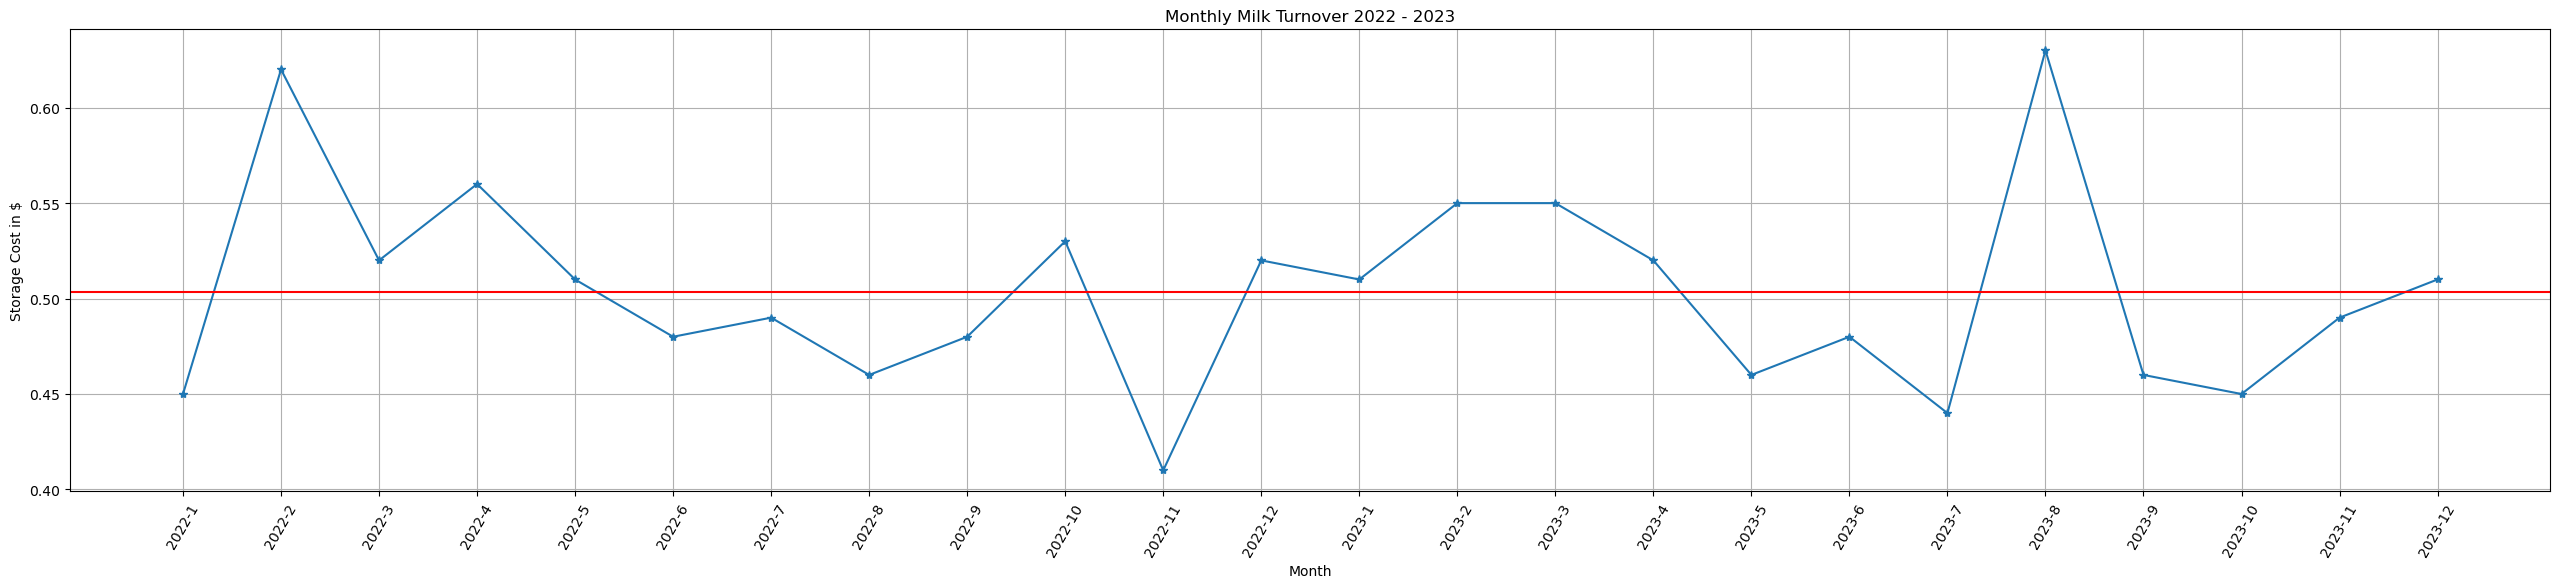

In [54]:
# menambah colomn ['month_year'] 
avg_tor_milk = average_month_turnover_ratio['turnover_ratio'].mean()
average_month_turnover_ratio['month_year'] = average_month_turnover_ratio['year'].astype(str) + '-' + average_month_turnover_ratio['month'].astype(str)
# set size plot
plt.figure(figsize=(32, 6))

# Line Plot
plt.subplot(1, 1, 1) #set canvas
plt.plot(average_month_turnover_ratio['month_year'], average_month_turnover_ratio['turnover_ratio'], marker='*', linestyle='-')
plt.axhline(y= avg_tor_milk, color='r', linestyle='-') #line total rata-rata

#set atribut
plt.title('Monthly Milk Turnover 2022 - 2023')
plt.xlabel('Month')
plt.ylabel('Storage Cost in $')
plt.xticks(rotation=60)
plt.grid()

In [55]:
good_tor_milk = tor_milk[tor_milk['turnover_ratio'] >= 0.5 ]
good_tor_milk

,supplier,farm_state,turnover_ratio
2,Dairyland Co-op,AZ,0.61
3,Dairyland Co-op,CA,0.65
5,Dairyland Co-op,CT,0.80
6,Dairyland Co-op,DE,0.79
7,Dairyland Co-op,FL,0.89
...,...,...,...
173,Organic Valley,RI,0.58
178,Organic Valley,VT,0.66
179,Organic Valley,WA,0.57
180,Organic Valley,WI,0.68


In [56]:
bad_tor_milk = tor_milk[tor_milk['turnover_ratio'] < 0.5 ]
print(bad_tor_milk)

            supplier farm_state  turnover_ratio
0    Dairyland Co-op         AK            0.40
1    Dairyland Co-op         AR            0.30
4    Dairyland Co-op         CO            0.40
8    Dairyland Co-op         GA            0.29
10   Dairyland Co-op         IA            0.01
..               ...        ...             ...
174   Organic Valley         SC            0.19
175   Organic Valley         SD            0.27
176   Organic Valley         TN            0.28
177   Organic Valley         TX            0.42
181   Organic Valley         WV            0.40

[94 rows x 3 columns]


94 Baris produk di atas merupakan produk yang perlu dilakukan evaluasi atau memungkinkan untuk tidak diambil sebagai stock gudang.

## 3.4 Hubungan Harga denga Turnover Ratio

In [57]:
corr_rho, pval_s = stats.spearmanr(df_milk['price_per_kg'], df_milk['turnover_ratio'])     # Spearman (rho)
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")    # Spearman (rho)

rho-correlation: 0.13, p-value: 0.004026601470282994


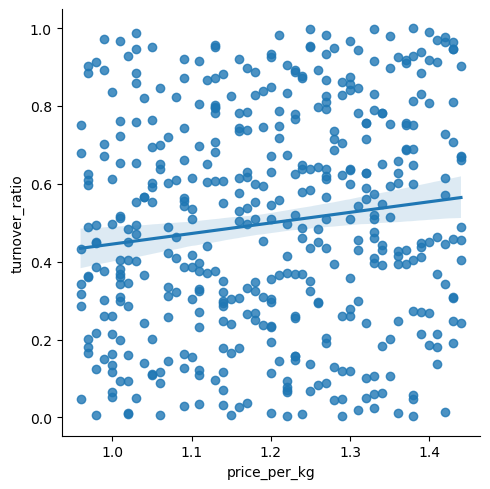

In [58]:
sns.lmplot(data=df_milk, x='price_per_kg', y='turnover_ratio')

Visualisai scatterplot di atas membantu pemahaman terkait hubungan antara turnover ratio dengan harga produk (dalam konteks ini adalah susu). P-value sebesar 0,004 menandakan bahwa korelasi antara kedua variabel tidak signifikan secara statistik jika dibandingkan dengan critical value 0.05. Sedangkan rho-correlation senilai 0.13 menandakan korelasi yang kecil, atau dapat diartikan bahwa terdapat hubungan positif antara harga dan tingkat turnovber produk, tetapi malah sebaliknya, yaitu semakin tinggi harga maka semakin cepat produk terjual. Sehingga dapat disimpulkan sesuai tujuan masalah bahwa harga bukan menjadi variabel yang mempengaruhi lama atau tidaknya produk terjual.

# 4. Pengambilan Kesimpulan

1. Berapa rata-rata cost perbulan dalam penyimpanan produk diary selama tahun 2022 - 2023? Adakah periode tertentu yang dapat ditarik pola-nya?
2. Berapa total rata-rata cost untuk setiap produk? Apakah sebanding dengan rata-rata revenue setiap produk? Produk apa yang memiliki cost tinggi dan revenue rendah?
3. Berapa turnover ratio untuk setiap produk? Apakah dapat menunjukkan produk yang kurang profitable?
4. Berapa perbandingan suplier terhadap produk yang paling kurang profitable di tahun 2022 dan 2023?
5. Apakah produk yang memeiliki turnover ratio paling rendah disebabkan oleh harga yang tingii? Akan dilakukan pengujian korelasi
6. Apakah kategori produk yang akan diveluasi memiliki hubungan dengan farm? atau suplier?

1. Rata-rata cost dalam setiap bulan untuk penyimpanan produk diary dalam dua tahun adalah sebesar $ 4980.97. Trend yang terjadi antara produk yang masuk ke storage dengan produk yang terjual belum dapat ditarik kesimpulannya, karena trend sealama periode tersebut fluktuatif.
2. Rata-rata total cost untuk Butter adalah 2627.34, untuk Cheese 1579.41 untuk Milk 11294.42 dan untuk Yogurt adalah 4476.66. Pemasukan yang didapat dari masing-masing kategori tersebut masih berjumlah lebih banyak dari cost, tetapi yang paling tidak profitable adalah produk 'Milk'.
3. Produk yang kurang profitable adalah produk susu, karena memiliki perbandingan cost dan revenue yang timpang.
4. Suplier produk susu memiliki persebaran yang rata.
5. Berdasarkan uji korelasi, tidak ditemukan bahwa harga yang tinggi menyebabkan produk tidak cepat terjual, kondisi yang terjadi adalah sebaliknya, yaitu produk dengan harga yang lebih tinggi cenderung lebih cepat terjual, walupun tidak signifikan.
6. Produk dengan postensi paling rendah memiliki keterkaitan dengan suplier dan farm, terdapat 94 produk dari suplier dan farm yang berbeda-beda dan memiliki turnover ratio dibawah rata-rata turn over produk susu per bulannya.


